<a href="https://colab.research.google.com/github/neutral-technician/Induction_Motor_Fault_Detection/blob/main/4AI3_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# comonly used modules
import numpy as np
from matplotlib import pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# plots, display, visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import pandas as pd

# Widget and formatting modules
import ipywidgets
from ipywidgets import interact, interactive, interact_manual
import pylab

import glob
from matplotlib import rcParams

In [ ]:
file_path = "/content/gdrive/MyDrive/fault_data/"
normal_file_names = glob.glob(file_path+'/normal/*.csv',recursive=True)
imnormal_file_names_5mm = glob.glob(file_path+'/horizontal_misalignment/0.5mm/*.csv',recursive=True)

imbalanced_6g = glob.glob(file_path+'/imbalance/6g/*.csv',recursive=True)
imbalanced_10g = glob.glob(file_path+'/imbalance/10g/*.csv',recursive=True)
imbalanced_15g = glob.glob(file_path+'/imbalance/15g/*.csv',recursive=True)
imbalanced_20g = glob.glob(file_path+'/imbalance/20g/*.csv',recursive=True)
imbalanced_25g = glob.glob(file_path+'/imbalance/25g/*.csv',recursive=True)
imbalanced_30g = glob.glob(file_path+'/imbalance/30g/*.csv',recursive=True)
imbalanced_35g = glob.glob(file_path+'/imbalance/35g/*.csv',recursive=True)


In [ ]:
header = ['frequency','axial overhang','radiale overhang','tangential overhang','axial underhang', 'radial overhang', 'tangential overhang', 'microphone']


In [ ]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [ ]:
data_n = dataReader(normal_file_names)
data_5g = dataReader(imbalanced_25g)

In [ ]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [ ]:
data_n = downSampler(data_n, 0, 5000)
data_5g = downSampler(data_5g, 0, 5000)

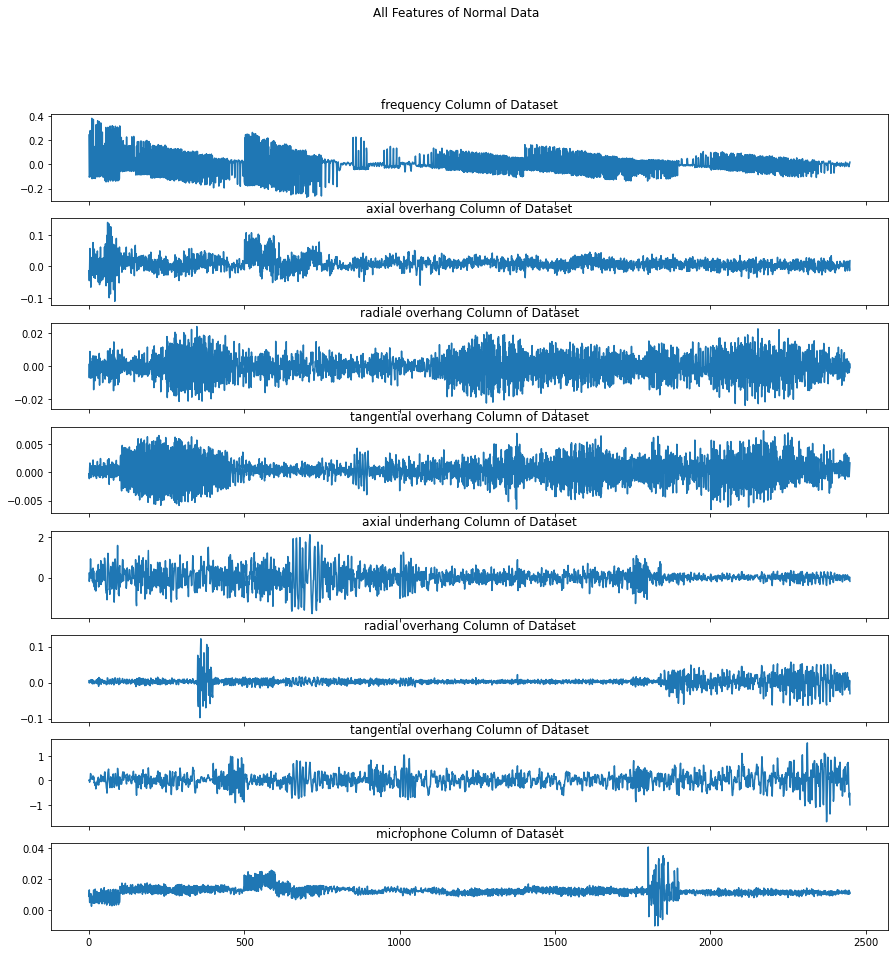

In [ ]:
fig, axs = plt.subplots(8, sharex=True, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Data')
for i in data_n.columns:
    axs[i].plot(data_n[i])
    axs[i].set_title(header[i] + ' Column of Dataset')

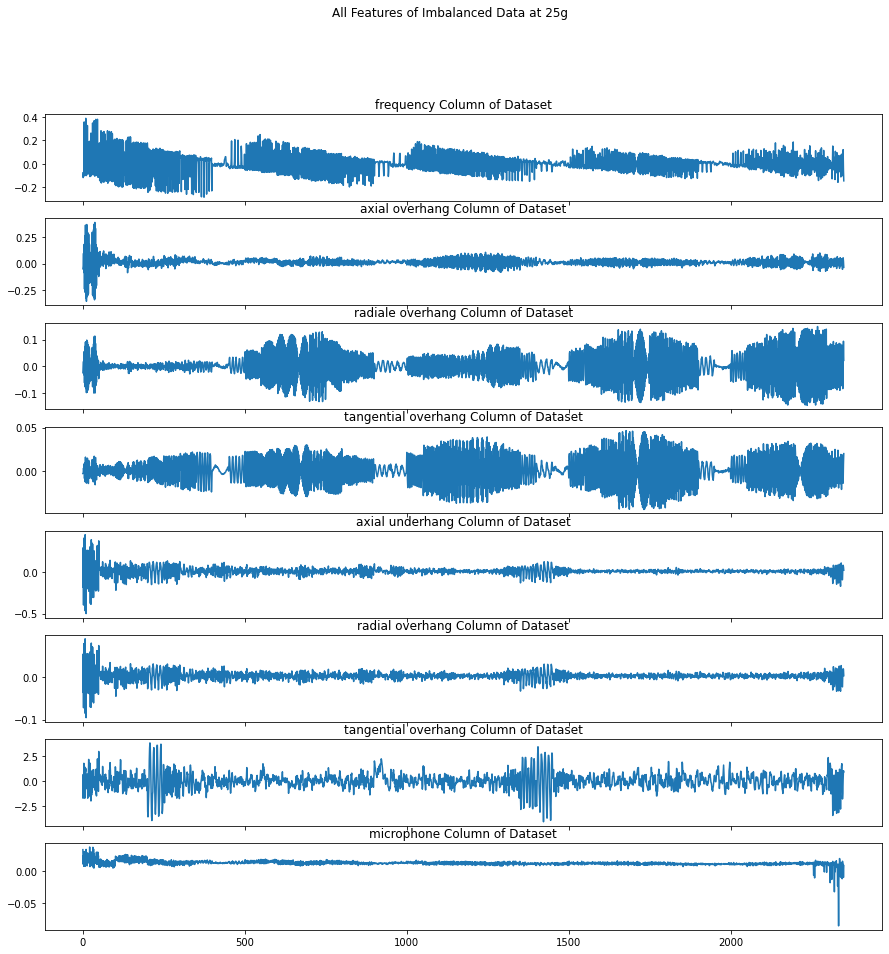

In [ ]:
fig, axs = plt.subplots(8, sharex=True, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Imbalanced Data at 25g')
for i in data_5g.columns:
    axs[i].plot(data_5g[i])
    axs[i].set_title(header[i] + ' Column of Dataset')

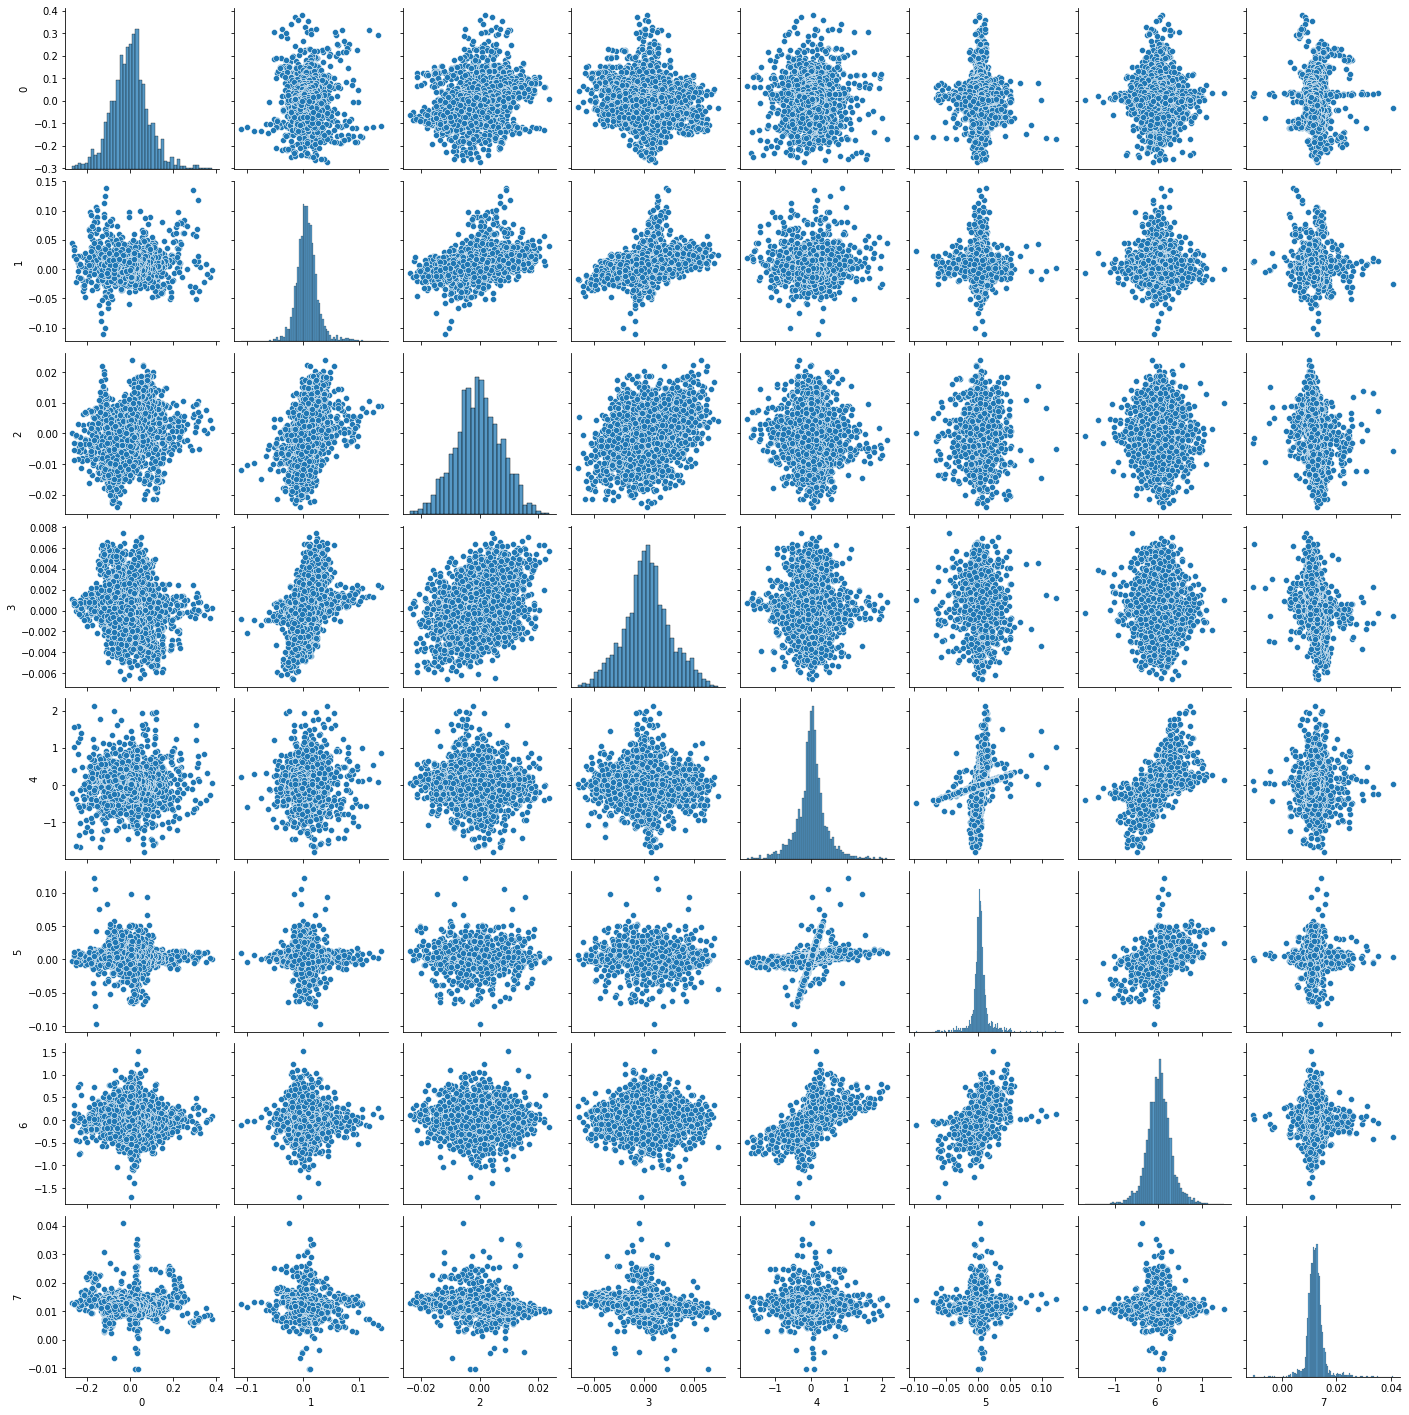

In [ ]:
sns.pairplot(data_n)

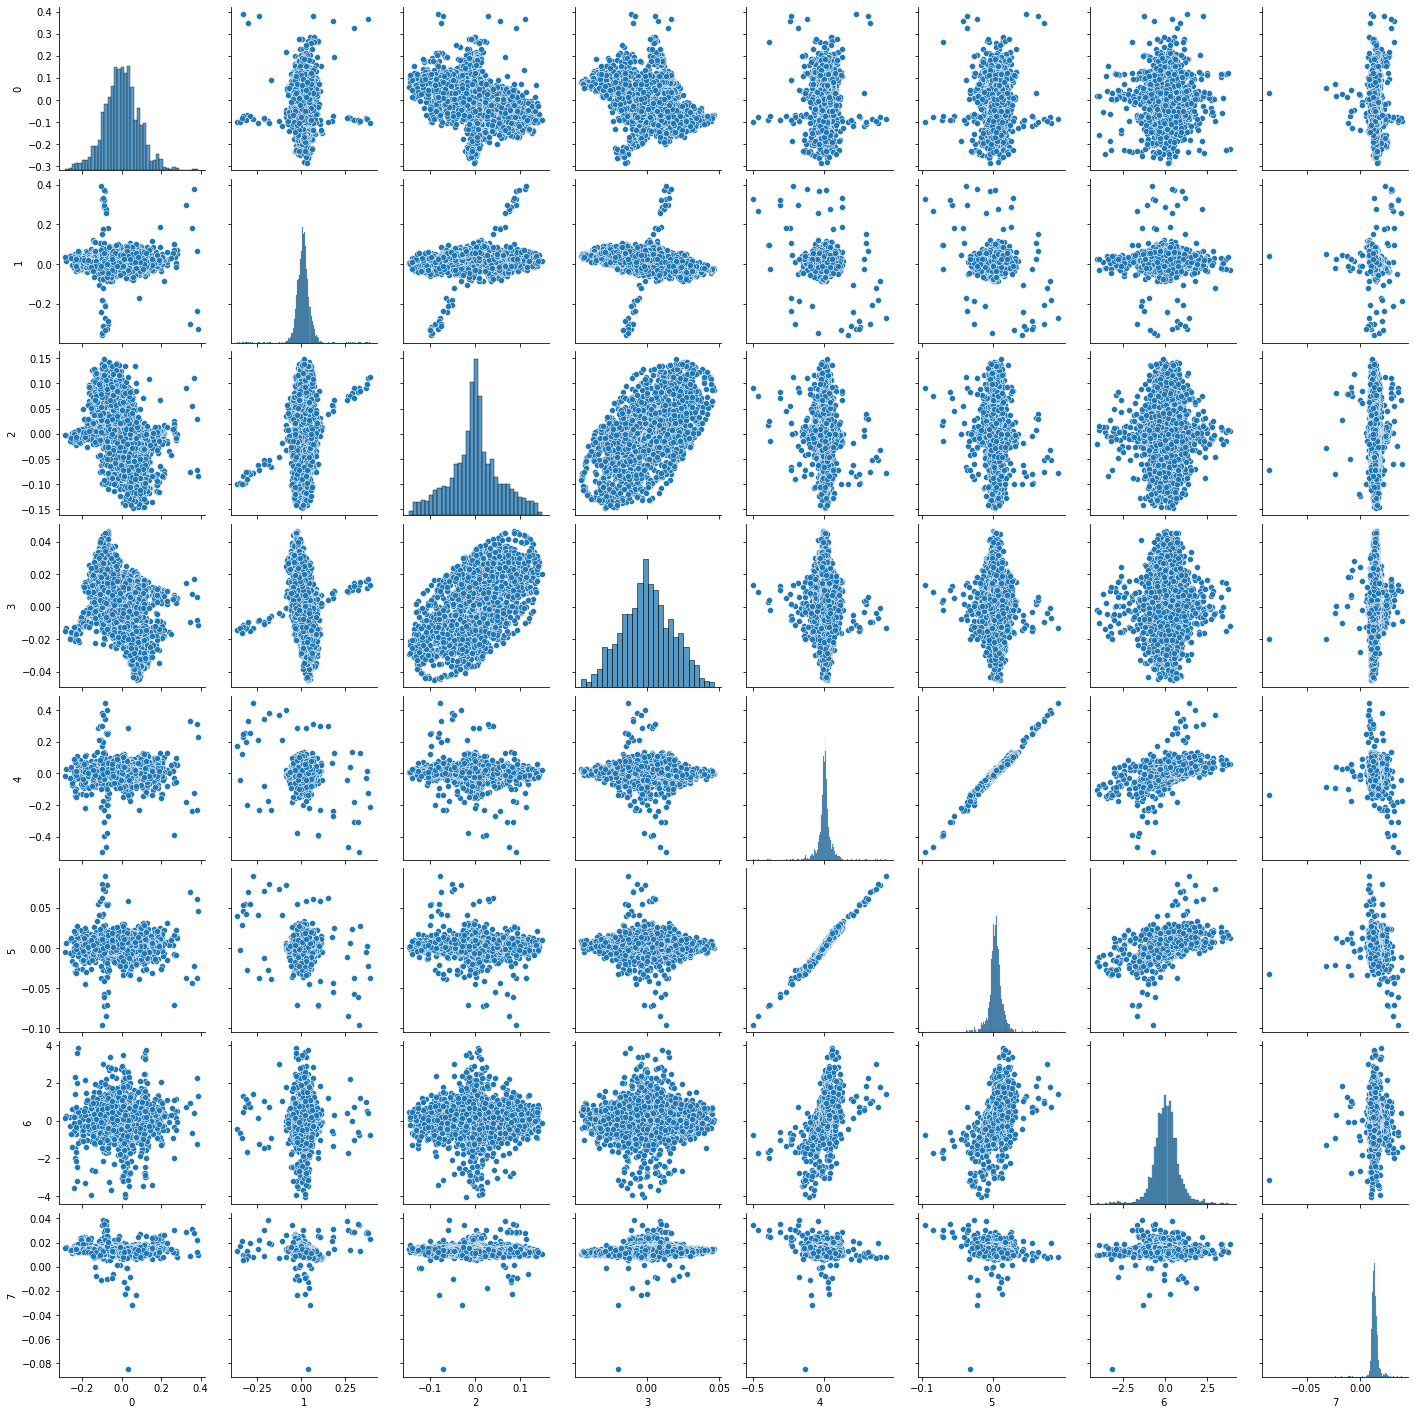

In [ ]:
sns.pairplot(data_5g)

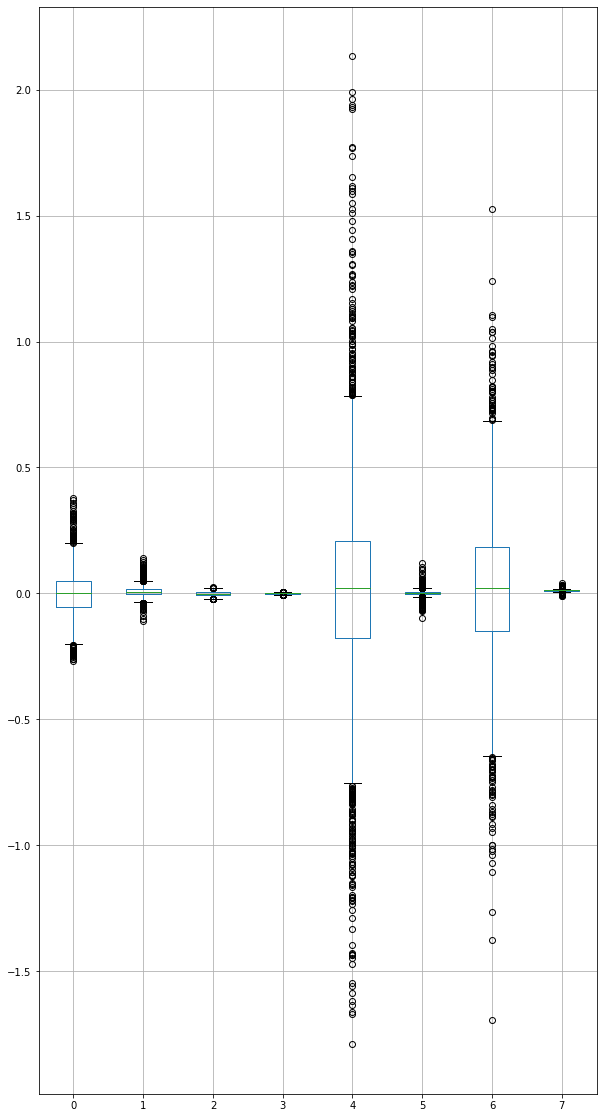

In [ ]:
rcParams['figure.figsize'] = 10,20
data_n.boxplot()


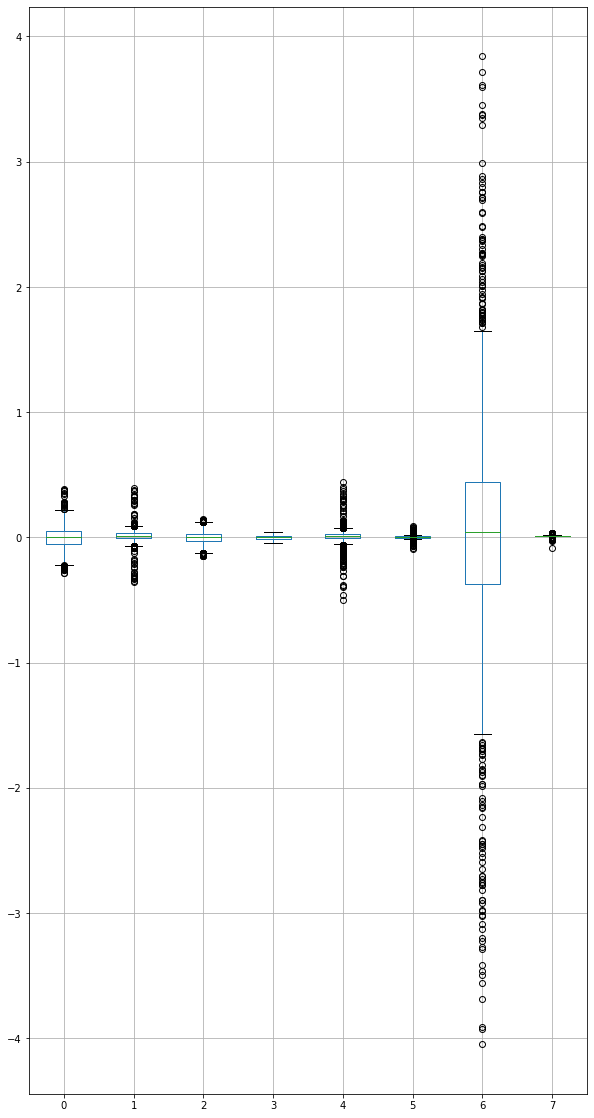

In [ ]:
rcParams['figure.figsize'] = 10,20
data_5g.boxplot()